This notebook is based on datacamp's Statistical learning in Python (Justin Bois)

<h1> Exploratory analysis & basic statistics tools </h1>

In [1]:
# import libraries

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

<img src='images/iris-machinelearning.png'> </img>

- sepal - kališný lístok
- petal - okvetný lístok

In [2]:
# load Iris dataset

iris_obj = load_iris()

In [3]:
# let's check the iris dataset object

# iris_obj.data
# iris_obj.target
# len(iris_obj.data)
# len(iris_obj.target)
# type(iris_obj.data)
# type(iris_obj.target)
iris_obj.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# let's transform numpy array to pandas dataframe, we are joining features and labels here to one dataframe
iris = pd.DataFrame(iris_obj.data, 
                    columns =iris_obj.feature_names,
                    index=pd.Index([i for i in range(iris_obj.data.shape[0])])).join(
       pd.DataFrame(iris_obj.target, 
                    columns=["species"],
                    index=pd.Index([i for i in range(iris_obj.target.shape[0])])))

# here label "0" means setosa, "1" means versicolor, and "2" means virginica
iris.species.replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)

In [5]:
# let's investigate the dataframe
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

<h2> 1. Exploratory data analysis (EDA) </h2>

<h3> 1.1 Histogram vs. bee-swarm plot vs. ECDF - visual evaluation</h3>

In [6]:
# set default seaborn style
sns.set()

# reset default matplotlib style
# sns.reset_orig()

In [7]:
# petal length per species
versicolor_petal_length = iris[iris["species"] == "versicolor"]["petal length (cm)"]
setosa_petal_length = iris[iris["species"] == "setosa"]["petal length (cm)"]
virginica_petal_length = iris[iris["species"] == "virginica"]["petal length (cm)"]

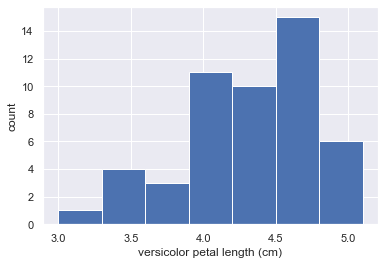

In [8]:
# Histogram  

# number of bins as sqrt of # of data points
n_data = len(versicolor_petal_length)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

# plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)  # try different nbins (e.g. 12)

# axes labels
plt.xlabel('versicolor petal length (cm)')
plt.ylabel('count')

# show plot
plt.show()

We can see that there is bias due to chosen number of bins.

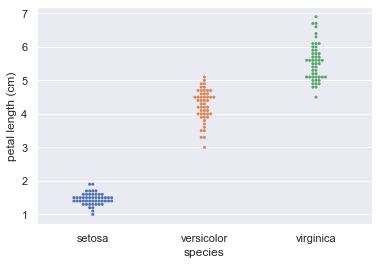

In [9]:
# Beeswarm plots

# plot petal length for different species
sns.swarmplot(x = 'species', y = 'petal length (cm)', data = iris, size=3)  # try size 4

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

But what if we have many datapoints? We can not visualize this with the bee-swarm plot anymore.

---

<b> Empirical cumulative distribution function </b>
- ECDF = y = f(x) is fraction of all observations that has value < than corresponding x value

In [10]:
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements.
    :param data: a one-dimensional array of measurements
    :return: x, y, where ECDF = y = f(x)
    """
    # number of data points
    n = len(data)

    # x-data for the ECDF, sorted by magnitude
    x = np.sort(data)

    # y-data for the ECDF, integers spread evently between 0 and 1
    y = np.arange(1, n + 1.0) / n

    return x, y

In [11]:
# why n+1? because of this behavior of arange()
np.arange(1, 5)

array([1, 2, 3, 4])

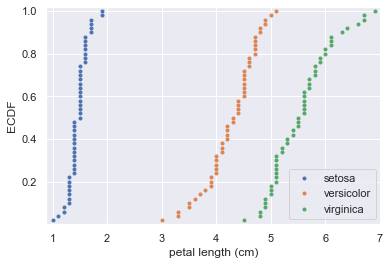

In [12]:
# compute ECDFs for different flower species
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# scatter plots - plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker = '.', linestyle='none')
plt.plot(x_vers, y_vers, marker = '.', linestyle='none')
plt.plot(x_virg, y_virg, marker = '.', linestyle='none')

# make nice margins
plt.margins(0.02)

# annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

The ECDFs expose clear differences among the species. 
Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica. ECDF has clear advantage over histograms (sensitive to # of bins) and beeswarm plots (not useful for many observations).

<h3> 1.2 Quantative evaluation </h3>

In [13]:
# useful describe() method callable on dataframes; useful especially for numerical attributes
iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

<img src='images/iqr.png'> </img>

**Box plots & percentiles**
- percentiles - measure spread of the data
- percentiles (IQR) are not sensitive to outliers, in contrast with variance/standard deviation (mean distance of the data from their mean)


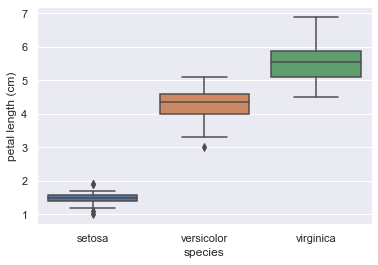

In [14]:
# create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=iris)

# label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# show the plot
plt.show()

---

<h3> 1.3 Correlation </h3>

<b>Covariance</b> 
- measure of the joint variability of two random variables

<img src='images/cov.png' width=40%> </img>

<b>Pearson correlation coefficient</b> 
- measure of linear relationship
- how much of the variability in the two variables is due to two of them being correlated
- ranges between -1 (extreme negative correlation) and 1 (extreme positive correlation), with values around 0 quantifying very weak correlation 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

<img src='images/pearson.png' width=40%> </img>

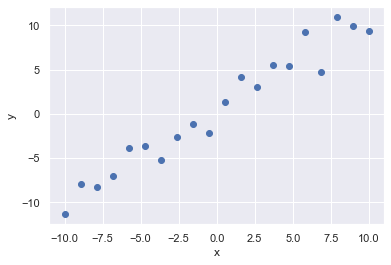

In [15]:
# creating artificial data - linear relationship between x a y
x = np.linspace(-10, 10, 20).tolist()
y = [i + np.random.normal(0, 1.5) for i in x]  # random normal noise with mean 0 and standard deviation 1.5

# plot artificial data
plt.scatter(x, y)

# axes labels
_ = plt.xlabel('x')
_ =plt.ylabel('y')

In [16]:
# strong linear relationship - high Pearson coefficient
scipy.stats.pearsonr(x, y)

(0.9745936154902312, 3.820292318729733e-13)

In [17]:
# artificial data - nonlinear non-monotonous relationship between x a y
x = np.linspace(-10, 10, 20).tolist()
y = [i*i + np.random.normal(1, 1) for i in x]

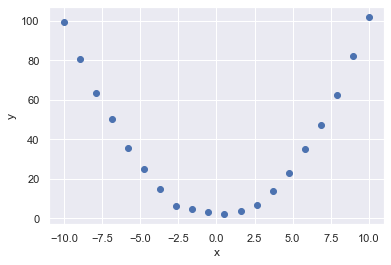

In [18]:
plt.scatter(x, y)
_ = plt.xlabel('x')
_ =plt.ylabel('y')

In [19]:
# nonlinear non-monotonous relationship - low Pearson coefficient
scipy.stats.pearsonr(x, y)

(-0.0003060076355826946, 0.9989784028034842)

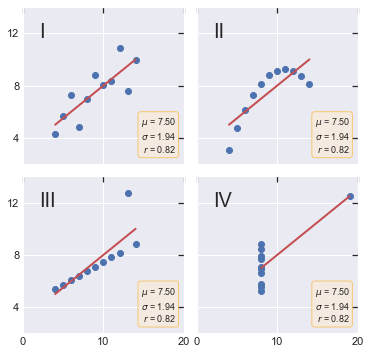

In [20]:
# importance of EDA - Anscombe's quartet

# Anscombe's quartet data
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)
    x_lin = np.array([np.min(x), np.max(x)])
    y_lin = p1 * x_lin + p0
    ax.plot(x_lin, y_lin, 'r-', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

# show plot 
plt.show()

In [21]:
# Anscombe's quartet data
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# iterate through x,y pairs
for xx, yy in zip([x, x, x, x4], [y1, y2, y3, y4]):
    # compute the slope and intercept for linear fit to the data: a, b
    a, b = np.polyfit(xx, yy, 1)
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.000090909090909
slope: 0.5000000000000004 intercept: 3.0009090909090896
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.0017272727272735


<h2> 2. Probability distributions </h2>

<b> Statistical inference: </b>
- Draw probabilistic conclusions about what we might expect if we collected the same data again.
- Draw actionable conclusions from data.
- Draw more general conclusions from relatively few data or observations.

<h3> 2.1 Probability mass function (PMF) - probability distribution for discrete variables </h3>

**Binomial distribution**
- Binomial with 1 trial (n=1) is called Bernoulli distribution
- Example of Binomial distribution: how many defaults out of 100 loans, when p = 0.05 is probability of default 

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5]


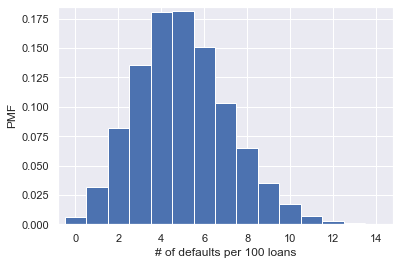

In [22]:
# number of positive outcomes (default) out of 100 
# we are repeating the draw 10,000 times
n_defaults = np.random.binomial(100, 0.05, 10000)

# compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
print(bins)

# generate histogram
plt.hist(n_defaults, density=True, bins=bins)

# set margins
plt.margins(0.02)

# label axes
plt.xlabel('# of defaults per 100 loans')
plt.ylabel('PMF')

# show the plot
plt.show()

---

**Poisson distribution**
- expresses the probability of a given number of events occurring in a fixed interval of time or space if these events 
occur with a known constant mean rate and independently of the time since the last event.

- Examples: 
    - buses in Poissonville
    - number of nuclear incidents per decade
    - number of football games without goals per season
    - number of advertising emails you receive each day
    
For example, you receive an average number of 4 emails per day. 
If receiving any particular email does not affect the arrival times of future emails, i.e., 
if emails from a wide range of sources arrive independently of one another, then a reasonable assumption is 
that the number of emails received in a day obeys a Poisson distribution.

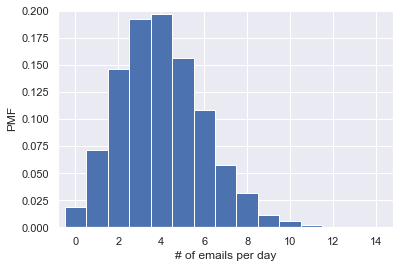

In [23]:
# number of positive outcomes (emails) per day
# we are repeating the draw 10,000 times
n_emails = np.random.poisson(4, 10000)

# compute bin edges: bins
bins = np.arange(0, max(n_emails) + 1.5) - 0.5

# generate histogram
plt.hist(n_emails, density=True, bins=bins)

# set margins
plt.margins(0.02)

# axes labels
plt.xlabel('# of emails per day')
plt.ylabel('PMF')

# show the plot
plt.show()

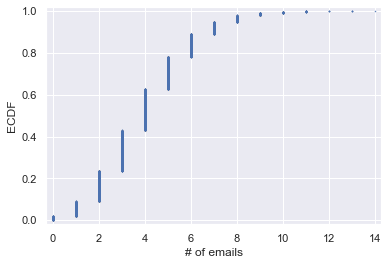

In [24]:
# ECDF for number of emails per day
x, y = ecdf(n_emails)

# plot ECDF
plt.plot(x, y, marker = '.', linestyle='none', markersize=1)

# make nice margins
plt.margins(0.02)

# annotate the plot
_ = plt.xlabel('# of emails')
_ = plt.ylabel('ECDF')

<h3> 2.2 Probability density function (PDF) - probability distribution for continous variables </h3>

**Normal distribution (Gaussian)**
- special place in nature (due to Central limit theorem)
- "light tails" - outliers are rare!

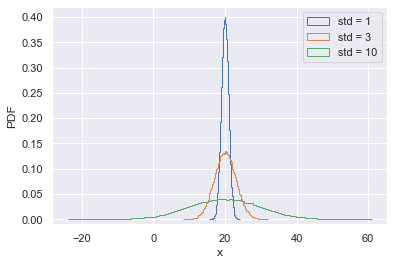

In [25]:
# draw 100,000 samples from Normal distribution, same mean, various standard deviations
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

# make histograms
plt.hist(samples_std1, density=True, histtype='step', bins = 100)
plt.hist(samples_std3, density=True, histtype='step', bins = 100)
plt.hist(samples_std10, density=True, histtype='step', bins = 100)

# annotate the plot
plt.xlabel('x')
plt.ylabel('PDF')

# make a legend
plt.legend(('std = 1', 'std = 3', 'std = 10'))

# set limits
plt.ylim(-0.01, 0.42)

# show plot
plt.show()

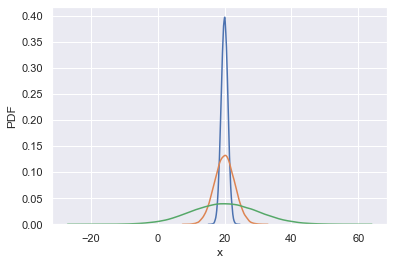

In [26]:
# smoothening - kernel density estimate - non-parametric way to estimate the probability density function of a random variable
_ = sns.kdeplot(data=samples_std1)
_ = sns.kdeplot(data=samples_std3)
_ = sns.kdeplot(data=samples_std10)

# annotate the plot
_ = plt.xlabel('x')
_ = plt.ylabel('PDF')

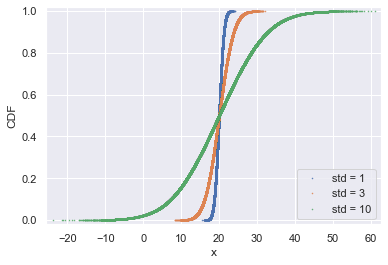

In [27]:
# generate CDFs for Normal distriution sample with various standard deviations
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# plot CDFs
plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none', markersize=1)
plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none', markersize=1)
plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none', markersize=1)

# make 2% margin
plt.margins(0.02)

# annotate the plot
plt.xlabel('x')
plt.ylabel('CDF')

# make a legend
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')

# show the plot
plt.show()

- mean = median for Normal dist, std changes the shape of CDF

---

In [28]:
# load Michelson-Morley experiment data from csv to pandas dataframe
mm = pd.read_csv('data/michelson_speed_of_light.csv')

In [29]:
# ckeck columns in the data
mm.columns

Index(['Unnamed: 0', 'date', 'distinctness of image', 'temperature (F)',
       'position of deflected image', 'position of slit',
       'displacement of image in divisions',
       'difference between greatest and least', 'B', 'Cor',
       'revolutions per second', 'radius (ft)', 'value of one turn of screw',
       'velocity of light in air (km/s)', 'remarks'],
      dtype='object')

Are data from Michelson-Morley experiment normally distributed? We expect so.

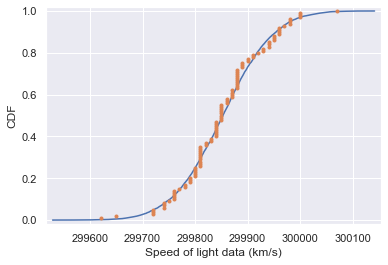

In [30]:
# compute mean and standard deviation
mu = np.mean(mm['velocity of light in air (km/s)'])
sigma = np.std(mm['velocity of light in air (km/s)'])

# sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(mm['velocity of light in air (km/s)'])

# plot the CDFs, empirical vs. theoretical
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Speed of light data (km/s)')
plt.ylabel('CDF')
plt.show()

Knowing the data are distributed this way, we can perform experiments. For example, what is the probability that the speed of light is larger than 300,000 km/s?

In [ ]:
# EXERCISE 1
# Compute probability that speed of light is larger than 300K km/s given mu and sigma for the Michelson Morley data

# take a 100K samples out of the Normal distribution
...

# compute the fraction that are > 300K km/s
...

<h2> 3. Bootstrapping </h2>

- we are interested how would the data change if we wold repeat the original experiment
- use of resampled data to perform statistical inference
- we are randomly resampling from the original data with replacement
- each instance of resampled data = bootstrap sample
- summary statistics computed from bootsrap sample = bootstrap replicate
- this is useful e.g. for computing of confidence intervals of statistics

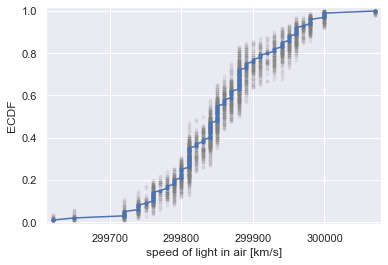

In [32]:
# bootstraping MM speed of light data to get idea how is the distribution actually spread
# let's create 50 bootstrap samples
for i in range(50):
    # generate bootstrap sample
    bs_sample = np.random.choice(mm["velocity of light in air (km/s)"], size=len(mm))

    # compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

# compute and plot ECDF from original data
x, y = ecdf(mm["velocity of light in air (km/s)"])
plt.plot(x, y, marker='.')

# make margins and label axes
plt.margins(0.02)
plt.xlabel('speed of light in air [km/s]')
plt.ylabel('ECDF')

# show the plot
plt.show()

In [33]:
def draw_bs_reps(data, func, size):
    """
    Draw bootstrap replicates.
    :param data: dataset to bootstrap from
    :param func: statistical function
    :param size: number of replicates
    :return: array of bootstrap replicates
    """
    # initialize array of replicates
    bs_replicates = np.empty(size)

    # generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))

    return bs_replicates

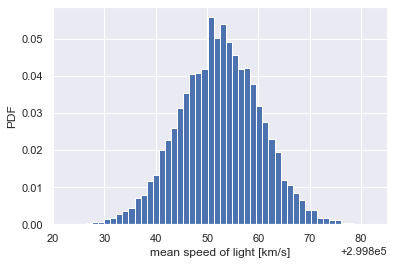

In [34]:
# take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(mm["velocity of light in air (km/s)"], np.mean, 10000)

# make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)

# label axes
_ = plt.xlabel('mean speed of light [km/s]')
_ = plt.ylabel('PDF')

# show the plot
plt.show()

In [35]:
# compute standard error of mean for normally distributed data
sem = np.std(mm["velocity of light in air (km/s)"]) / np.sqrt(len(mm))
print(sem)

7.861450247886836


In [36]:
# compute standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

7.869441868290254


- these two are basically the same as the distribution of data is close to Normal distribution
- bootstrapping is useful especially when the distribution of data is not Normal or is even exotic

In [37]:
# 95% confidence interval for the mean using computed bootsrap replicates
np.percentile(bs_replicates, [2.5, 97.5])

array([299836.8, 299867.8])

In [ ]:
# EXERCISE 2

# take 10,000 bootstrap replicates of the standard deviation for the Michelson-Morley data
...

# make a histogram of the results
...

# label axes
_ = plt.xlabel('standard deviation of speed of light [km/s]')
_ = plt.ylabel('PDF')

# show the plot
plt.show()

# compute 95% confidence interval for the standard deviation using bootstrap replicates
...

In [40]:
# estimation of regression coefficients and their confidence intervals with bootstrapping
def draw_bs_pairs_linreg(x, y, size=1):
    """
    Perform pairs bootstrap for linear regression.
    Estimate of linear regression coefficients.
    """
    # set up array of indices to sample from: inds
    # we are bootsrapping in pairs so we need indexes
    inds = np.arange(len(x))

    # initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [41]:
# load literacy-fertility data from csv to pandas dataframe
flf = pd.read_csv('data/female_literacy_fertility.csv')

In [42]:
# check the data
flf.head()

Country  Continent  female literacy  fertility     population
0      Chine       ASI             90.5      1.769  1,324,655,000
1       Inde       ASI             50.8      2.682  1,139,964,932
2        USA       NAM             99.0      2.077    304,060,000
3  Indonésie       ASI             88.8      2.132    227,345,082
4     Brésil       LAT             90.2      1.827    191,971,506

In [43]:
# check the data
flf.describe()

female literacy   fertility
count       162.000000  162.000000
mean         80.107407    2.878673
std          23.052415    1.427597
min          12.600000    0.966000
25%          66.425000    1.823250
50%          90.000000    2.367500
75%          98.500000    3.880250
max         100.000000    7.069000

In [44]:
# filter usefull columns
literacy = flf['female literacy']
fertility = flf['fertility']

# generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(literacy, fertility, 1000)

# compute and 95% CI for slope parameter
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

[-0.05550921 -0.04430412]


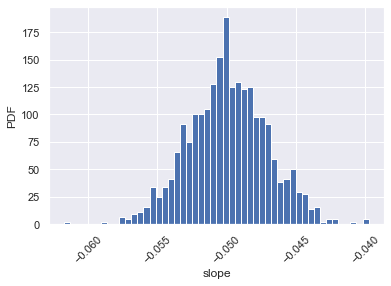

In [45]:
# plot the histogram - PDF of slope parameter
plt.hist(bs_slope_reps, bins=50, density=True)

# rotate x ticks
plt.xticks(rotation=45)

# label axes
plt.xlabel('slope')
plt.ylabel('PDF')

# show plot
plt.show()

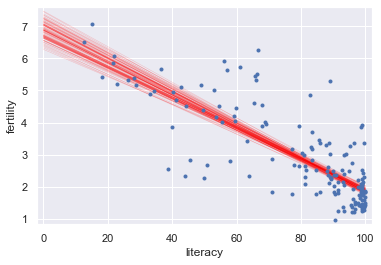

In [46]:
# generate array of x-values for bootstrap lines
x = np.array([0, 100])

# plot 100 bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

# plot the original data
plt.plot(literacy, fertility, marker='.', linestyle='none')

# label axes
plt.xlabel('literacy')
plt.ylabel('fertility')

# set the margins
plt.margins(0.02)

# show the plot
plt.show()

<h2> 4. Hypothesis testing </h2>

<h3> 4.1 Permutations </h3>

In [47]:
# we will be comparing two datasets and a function combining the two datasets, permuting the combined data and creating
# two datasets out of them with original shapes comes useful

def permutation_sample(data1, data2):
    """
    Generate two permuted samples from two original datasets.
    """
    # concatenate the data sets
    data = np.concatenate((data1, data2))

    # permute the concatenated array
    permuted_data = np.random.permutation(data)

    # split the permuted array in two array having 
    # shapes of the original arrays
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [48]:
# rainfall data from Sheffield weather station in june and november

rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

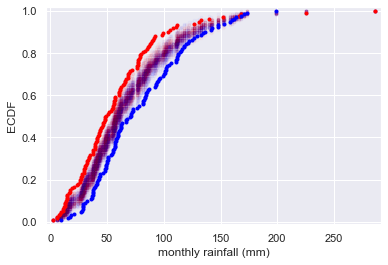

In [49]:
# hypothesis: rainfall distribution is identical for june and november
# let's compare ECDF from permuted datasets with those from original datasets

for i in range(50):
    # generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # plot ECDFs of permutation samples
    plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)

# create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

In [50]:
# we created function for generating bootsrap replicates, it would be usefull to have function for generating permutation
# replicates as well

def draw_perm_reps(data_1, data_2, func, size=1):
    """
    Generate multiple permutation replicates.
    """
    # initialize array of replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # compute the test statistic, the func used would have 
        # to take two argumets - the two arrays
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

<h3> 4.2 Test statistics and p value</h3>

<b>Test statistics</b>
- a single number that can be computed from observed data and from data you simulate under the null hypothesis
- basis of comparison between what we predict and what we observe
- test statistics should be pertinent to question we'd like to answer

<b>p value</b>
- probability of obtaining a value of the test statistic that is at least as extreme as what we observe, under the assumption that the null hypothesis is true
- not the probability that the null hypothesis is true!
- if p is small - data are statistically signifinatly different than what we would observe under the null hypothesis
- set p for practical significance - is the effect large enough to care in real world? (e.g. you are testing if drinking milk can give you better grades, those drinking milk have higher scores in a test, say 2/100 everage improvement, this has no practical meaning as it is well below grade difference of 10/100)

<b> Pipeline for hypothesis testing </b>
- clearly state the null hypothesis
- define your test statistic
- generate many sets of simulated data assuming the null hypothesis is true
- compute test statistic for each simulated dataset
- compute p value: p is fraction of your simulated date sets fro which the test statistic is at least as extreme as for the real data

<img src='images/frog.jpg' width=30%> </img>

In [51]:
# load frog tongue data from csv to pandas dataframe
frog = pd.read_csv('data/frog_tongue.csv')

In [52]:
# inspect the form of the data
frog.head()

date ID  trial number  impact force (mN)  impact time (ms)  \
0  2013_02_26  I             3               1205                46   
1  2013_02_26  I             4               2527                44   
2  2013_03_01  I             1               1745                34   
3  2013_03_01  I             2               1556                41   
4  2013_03_01  I             3                493                36   

   impact force / body weight  adhesive force (mN)  \
0                        1.95                 -785   
1                        4.08                 -983   
2                        2.82                 -850   
3                        2.51                 -455   
4                        0.80                 -974   

   time frog pulls on target (ms)  adhesive force / body weight  \
0                             884                          1.27   
1                             248                          1.59   
2                             211                          1.37   
3                            1025                          0.74   
4                             499                          1.57   

   adhesive impulse (N-s)  total contact area (mm2)  \
0                  -0.290                       387   
1                  -0.181                       101   
2                  -0.157                        83   
3                  -0.170                       330   
4                  -0.423                       245   

   contact area without mucus (mm2)  \
0                                70   
1                                94   
2                                79   
3                               158   
4                               216   

   contact area with mucus / contact area without mucus  \
0                                               0.82      
1                                               0.07      
2                                               0.05      
3                                               0.52      
4                                               0.12      

   contact pressure (Pa)  adhesive strength (Pa)  
0                   3117                   -2030  
1                  24923                   -9695  
2                  21020                  -10239  
3                   4718                   -1381  
4                   2012                   -3975

In [53]:
# how many kinds of horn frogs?
frog.ID.value_counts()

I      20
IV     20
II     20
III    20
Name: ID, dtype: int64

In [54]:
# let's investigate just two types of frogs - ID = II and IV
frog_II_IV = frog.copy()[(frog['ID'] == "II") | (frog['ID'] == "IV")]
frog_II_IV['impact force'] = frog_II_IV['impact force (mN)']/1000.0

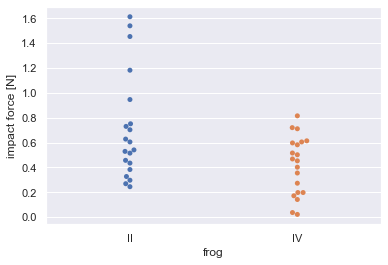

In [55]:
# little bit of EDA

# make bee swarm plot
sns.swarmplot(x='ID', y='impact force', data=frog_II_IV)

# label axes
plt.xlabel('frog')
plt.ylabel('impact force [N]')

# show the plot
plt.show()

In [56]:
# what is the average impact force per frog type
frog_II_IV[["impact force", "ID"]].groupby("ID").mean()

impact force
ID              
II       0.70735
IV       0.41910

The average strike force of Frog II was 0.71 N, and that of Frog IV was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance? <=> data come from the same distribution

In [57]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """
    Generate multiple permutation replicates.
    """
    # initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [58]:
def diff_of_means(data_1, data_2):
    """
    Difference in means of two arrays.
    """
    # the difference of means of data_1, data_2
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [59]:
# respective forces
force_ii = frog_II_IV[frog_II_IV['ID']=='II']['impact force']
force_iv = frog_II_IV[frog_II_IV['ID']=='IV']['impact force']

In [60]:
# compute difference of mean impact force from experiment
empirical_diff_means = diff_of_means(force_ii, force_iv)

# draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(force_ii, force_iv, diff_of_means, size=10000)

# compute p-value
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0046


The p-value tells you that there is <1% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be <b>statistically significant.</b>

But: warning!  You have computed a p-value; it is a number. Do not distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

<h3> 4.3 Permutations vs bootstraping in hypothesis testing </h3> 

Example 1

Another frog was studied, Frog with ID = III, and you want to see if Frog IV and Frog III have similar impact forces. 
Unfortunately, you do not have Frog III's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the 
forces from Frog IV and Frog III come from the same distribution. You will therefore test another, less restrictive hypothesis: 
<b>The mean strike force of Frog IV is equal to that of Frog III.</b>

In [61]:
# respective forces
frog_III_IV = frog.copy()[(frog['ID'] == "III") | (frog['ID'] == "IV")]
frog_III_IV['impact force'] = frog_III_IV['impact force (mN)']/1000.0
force_iii = frog_III_IV[frog_III_IV['ID']=='III']['impact force'] 
force_iv = frog_III_IV[frog_III_IV['ID']=='IV']['impact force']

In [62]:
# what is the average impact force per frog type
frog_III_IV[["impact force", "ID"]].groupby("ID").mean()

impact force
ID               
III        0.5501
IV         0.4191

In [63]:
# make an array of translated impact forces
translated_force_iv = force_iv - np.mean(force_iv) + np.mean(force_iii)  # we are shifting data of frog IV to have mean of frog III

# take bootstrap replicates of Frog IV's translated impact forces
bs_replicates = draw_bs_reps(translated_force_iv, np.mean, 10000)

# compute fraction of replicates that are less than the observed Frog IV force
p = np.sum(bs_replicates <= np.mean(force_iv)) / 10000
print('p = ', p)

p =  0.0055


The low p-value suggests that the null hypothesis is false.

Example 2

We now want to test the hypothesis that <b>Frog II and Frog IV have the same mean impact force, 
but not necessarily the same distribution</b>, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [ ]:
# EXERCISE 3

# compute mean of both forces; use np.concatenate or pd.concat to concatenate the force_ii and force_iv series
mean_force = ...

# generate shifted arrays
force_ii_shifted = ...
force_iv_shifted = ...

# compute 10,000 bootstrap replicates (mean) from shifted arrays
bs_replicates_ii = ...
bs_replicates_iv = ...

# get replicates of difference of means: bs_replicates
bs_replicates = ...

# compute and print p-value
p = ...

A similar result as when we did the permutation test. Nonetheless, remember that it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or in the distribution of impact forces?

<h3> 4.4 A/B testing </h3> 

Problem: is there a real difference in the time spent on the website before and after ad campaign?

Null hypothesis: there is no difference in the mean time spent on the website before and after the ad campaign.

In [65]:
# artificial data - time spend on the website before and after campaign in some arbitrary time units

before = np.array([1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
                    81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
                    462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
                    271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
                    1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
                    966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
                    1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
                    96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
                    1114,  813,  887])

after = np.array([645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
                   4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
                   2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
                     73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
                     37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
                    288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
                    675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
                    136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
                    605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
                    778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
                    252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
                   2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
                    206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
                     55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
                   2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
                    578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
                    391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
                    603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
                    419,  239,  119,  129,  467])

In [ ]:
# EXERCISE 4
# Problem: is there a real difference in the time spent on the website before and after ad campaign?
# Null hypothesis: there is no difference in the mean time spent on the website before and after the ad campaign.

# check mean values of "before" and "after" times
before_mean = ...
after_mean = ...
print("Before: %s" % before_mean)
print("After: %s" % after_mean)

# compute the observed difference of means of the times "before" and "after", use diff_of_means() function defined above
nht_diff_obs = ...
print("After - Before: %s" % nht_diff_obs)

# acquire 10,000 permutation replicates of difference in times, use draw_perm_reps() function defined above
perm_replicates = ...

# compute and print the p-value 
p = ...

<h3> 4.5 Testing for correlation significance </h3>

In [67]:
# correlation between literacy and fertility is negative, is this correlation statistically significant?
scipy.stats.pearsonr(literacy, fertility)[0]

-0.8041324026815345

In [68]:
# compute observed correlation: r_obs
r_obs = scipy.stats.pearsonr(literacy, fertility)[0]

# initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# draw replicates
for i in range(10000):
    # permute (mix up) illiteracy measurments
    literacy_permuted = np.random.permutation(literacy)

    # compute Pearson correlation
    perm_replicates[i] = scipy.stats.pearsonr(literacy_permuted, fertility)[0]

# compute p-value: p
p = np.sum(abs(perm_replicates) >= abs(r_obs))/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


This correlation is statistically significant and is very likely real.

In [69]:
# shortcut, scipy actually returns the p-value
scipy.stats.pearsonr(literacy, fertility)

(-0.8041324026815345, 5.635092985976583e-38)

<h2> 5. Case study - evolution of Darwin finches on Daphne Major island </h2>

<img src='images/finches.jpg' width=75%> </img>

In [70]:
# load finches data from csv to pandas dataframe

# 1975 data
finches_1975 = pd.read_csv('data/finch_beaks_1975.csv')
finches_1975['year'] = 1975

# 2012 data
finches_2012 = pd.read_csv('data/finch_beaks_2012.csv')
finches_2012['year'] = 2012

In [71]:
# inspecting the form of the data
finches_1975.head()

band species  Beak length, mm  Beak depth, mm  year
0     2  fortis              9.4             8.0  1975
1     9  fortis              9.2             8.3  1975
2    12  fortis              9.5             7.5  1975
3    15  fortis              9.5             8.0  1975
4   305  fortis             11.5             9.9  1975

In [72]:
# incepting the form of the data
finches_2012.head()

band species  blength  bdepth  year
0  19022  fortis     10.0     8.5  2012
1  19028  fortis     12.5     8.9  2012
2  19032  fortis      9.3     7.5  2012
3  19041  fortis     10.3     9.6  2012
4  19044  fortis     11.0     9.2  2012

<img src="images/finch_beak_diagram.png" width=50%>

In [73]:
# rename columns to match 2012 column names
finches_1975.rename(columns={'Beak length, mm': 'blength', 'Beak depth, mm': 'bdepth'}, inplace=True)

In [74]:
# concatenate the dataframes
# we will be studying scandens finches
finches = pd.concat([finches_1975[finches_1975['species'] == 'scandens'], finches_2012[finches_2012['species'] == 'scandens']])

In [75]:
# inspect the data
finches.head(-5)

band   species  blength  bdepth  year
316    302  scandens     13.9     8.4  1975
317    304  scandens     14.0     8.8  1975
318    306  scandens     12.9     8.4  1975
319    310  scandens     13.5     8.0  1975
320    317  scandens     12.9     7.9  1975
..     ...       ...      ...     ...   ...
238  21288  scandens     14.1    10.0  2012
239  21289  scandens     12.9     9.0  2012
240  21290  scandens     13.9     8.7  2012
241  21291  scandens     14.3     8.8  2012
242  21292  scandens     13.2     8.4  2012

[209 rows x 5 columns]

- Is there "evolution" in beak depths in Geospiza scandens finches between 1975 and 2012?

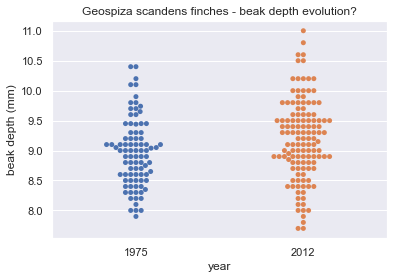

In [76]:
# EDA - bee swarm plot

# create bee swarm plot
sns.swarmplot(x='year', y='bdepth', data=finches)

# label the axes
plt.xlabel('year')
plt.ylabel('beak depth (mm)')

# title
plt.title('Geospiza scandens finches - beak depth evolution?')

# show the plot
plt.show()

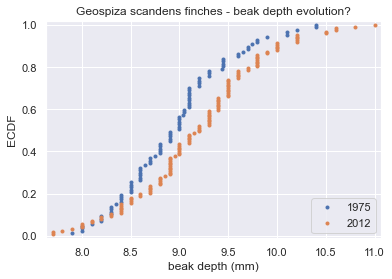

In [77]:
# EDA - ECDF

# 1975 and 2012 data, looking at bdepth
bd_1975 = finches_1975[finches_1975['species'] == 'scandens']['bdepth']
bd_2012 = finches_2012[finches_2012['species'] == 'scandens']['bdepth']

# compute ecdf
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# plot the ECDFs
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# set margins
plt.margins(0.02)

# add axis labels and legend
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.title('Geospiza scandens finches - beak depth evolution?')
plt.legend(('1975', '2012'), loc='lower right')

# show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

In [78]:
# let's look at difference of means, is the difference real?
# bootsrapping -> confidence interval for difference of means

# compute the difference of the sample means
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# compute samples of difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# compute 95% confidence interval
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06035926 0.3905338 ] mm


The plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [100]:
# hypothesis: the means are equal

# compute the difference of the sample means
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# print p-value
print('p =', p)

p = 0.0072


We get a p-value < 0.01, which suggests that the difference is statistically significant. But remember: it is very important to know how different they are! The difference in means in the data is about 0.2 mm. We should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

- Now, what about the beak shapes, can we see a difference in the beak shapes on our time interval?

In [80]:
# extract beak length data from the original dataframe
bl_1975 = finches_1975[finches_1975['species'] == 'scandens']['blength']
bl_2012 = finches_2012[finches_2012['species'] == 'scandens']['blength']

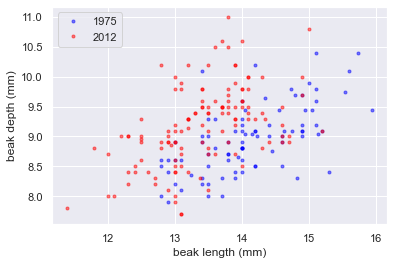

In [81]:
# make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.',
         linestyle='none', color='blue', alpha=0.5)

# make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.',
         linestyle='none', color='red', alpha=0.5)

# label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the vertical-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

In [82]:
# compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(np.array(bl_1975), np.array(bd_1975), 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(np.array(bl_2012), np.array(bd_2012), 1000)

# compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33810627 0.5933191 ]
1975: intercept = 2.390875236584226 conf int = [0.60313633 4.21852078]
2012: slope = 0.462630358835313 conf int = [0.33101278 0.59783417]
2012: intercept = 2.977247498236019 conf int = [1.18227275 4.74111766]


It looks like they have the same slope, but different intercepts.

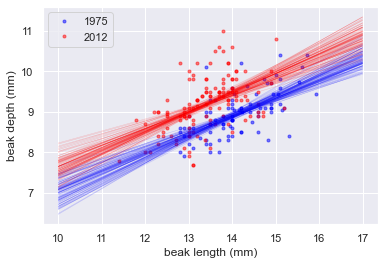

In [83]:
# make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.',
         linestyle='none', color='blue', alpha=0.5)

# make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.',
         linestyle='none', color='red', alpha=0.5)

# label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# generate x-values for bootstrap lines: x
x = np.array([10, 17])

# plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# show the plot
plt.show()

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison. 

In [84]:
# compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000) 
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000) 

# compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55724831 1.60114274]
2012: mean ratio = 1.4658342276847767 conf int = [1.44472204 1.48748768]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.